# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [128]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [129]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Liumouth,2019-01-01 0:08,37.91,5.670000e+12,69,Urban
1,Colemanland,2019-01-01 0:46,47.74,2.220000e+12,23,Suburban
2,Sotoville,2019-01-01 2:07,24.07,7.830000e+12,10,Suburban
3,Royland,2019-01-01 3:46,7.57,5.820000e+12,64,Urban
4,West Heidi,2019-01-01 5:23,10.75,6.570000e+12,28,Urban


## Deliverable 1: Get a Summary DataFrame 

In [130]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [131]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [132]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [133]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare / total_rides

In [134]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare / total_drivers

In [135]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fare,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver
})

In [136]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [137]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [138]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Liumouth,2019-01-01 0:08,37.91,5.670000e+12,69,Urban
1,Colemanland,2019-01-01 0:46,47.74,2.220000e+12,23,Suburban
2,Sotoville,2019-01-01 2:07,24.07,7.830000e+12,10,Suburban
3,Royland,2019-01-01 3:46,7.57,5.820000e+12,64,Urban
4,West Heidi,2019-01-01 5:23,10.75,6.570000e+12,28,Urban


In [139]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [140]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()

In [141]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = df.pivot(index = "date", columns = "type", values = "fare")
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [142]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = df.loc["2019-01-01":"2019-04-28"]

In [143]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [144]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2019-01-01 00:08:00 to 2019-04-27 08:48:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  564 non-null    float64
 2   Urban     1488 non-null   float64
dtypes: float64(3)
memory usage: 67.6 KB


In [145]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample("w").sum()
df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


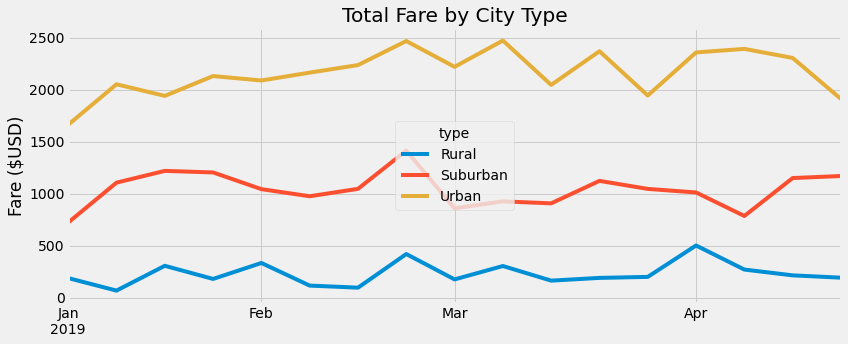

In [199]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df_chart = df.plot(figsize=(12,5))

df_chart.set_xlabel("")
df_chart.set_ylabel("Fare ($USD)")
df_chart.set_title("Total Fare by City Type")

df_chart.legend(title = "type", loc="center")

plt.tight_layout()

df_chart.figure.savefig("analysis/PyBer_fare_summary.png")


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

